In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/RTA Dataset.csv')

In [3]:
df.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.shape

(12316, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [7]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [9]:
df.drop(columns=['Service_year_of_vehicle','Fitness_of_casuality','Work_of_casuality','Defect_of_vehicle'],axis=1,inplace=True)

In [10]:
df.shape

(12316, 28)

In [11]:
df.duplicated().sum()

0

In [12]:
df.dropna(subset=['Age_band_of_driver', 'Type_of_vehicle', 'Accident_severity'], inplace=True)

In [13]:
df.drop_duplicates()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Residential areas,...,1,1,Moving Backward,Driver or rider,Female,18-30,3,Not a Pedestrian,Other,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11366 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         11366 non-null  object
 1   Day_of_week                  11366 non-null  object
 2   Age_band_of_driver           11366 non-null  object
 3   Sex_of_driver                11366 non-null  object
 4   Educational_level            10725 non-null  object
 5   Vehicle_driver_relation      10875 non-null  object
 6   Driving_experience           10651 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             10965 non-null  object
 9   Area_accident_occured        11165 non-null  object
 10  Lanes_or_Medians             11020 non-null  object
 11  Road_allignment              11241 non-null  object
 12  Types_of_Junction            10549 non-null  object
 13  Road_surface_type            11211 n

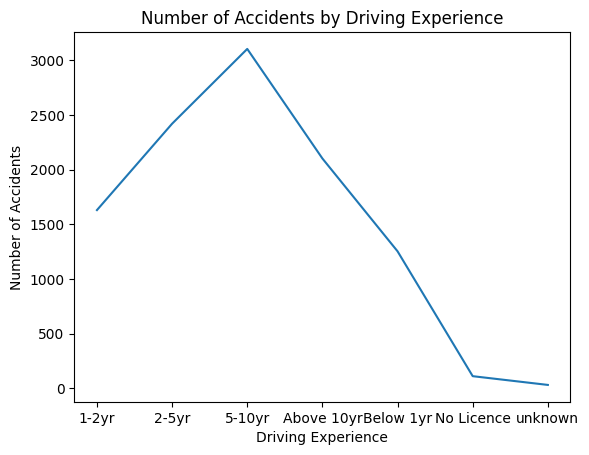

In [15]:
#Line Graph : Number of accidents by driving experience
accident_counts_by_experience = df.groupby('Driving_experience')['Accident_severity'].count()
plt.plot(accident_counts_by_experience.index, accident_counts_by_experience.values)
plt.xlabel('Driving Experience')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Driving Experience')
plt.show()


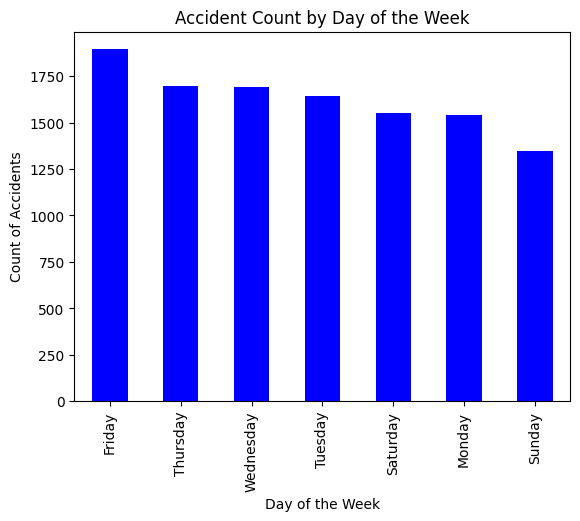

In [16]:
#Bar plot: Accident count by day of the week
df['Day_of_week'].value_counts().plot(kind='bar', color='blue')
plt.title('Accident Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Accidents')
plt.show()

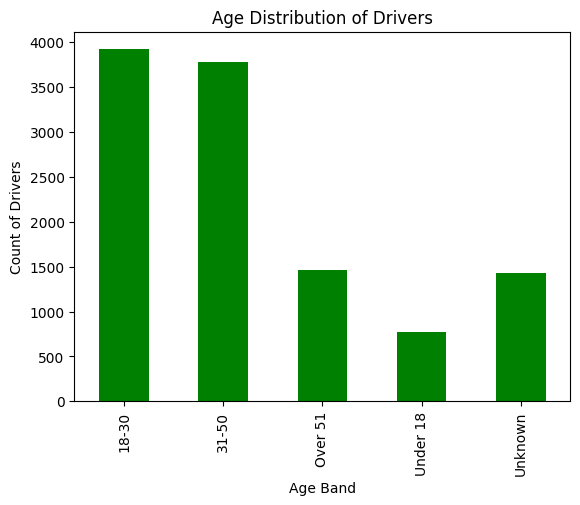

In [17]:
#Histogram: Age distribution of drivers
df['Age_band_of_driver'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Age Distribution of Drivers')
plt.xlabel('Age Band')
plt.ylabel('Count of Drivers')
plt.show()

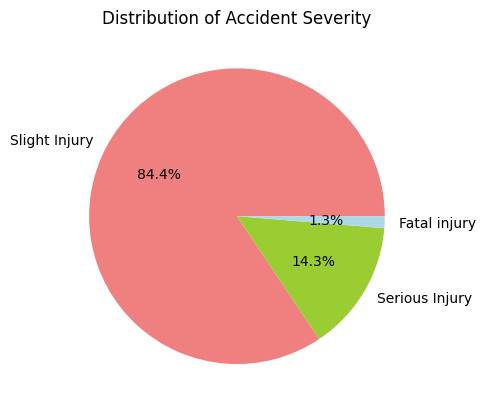

In [18]:
#Pie chart: Distribution of Accident Severity
df['Accident_severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'yellowgreen', 'lightblue'])
plt.title('Distribution of Accident Severity')
plt.ylabel('')
plt.show()

<ipython-input-19-b943461fcaf7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather_conditions', order=df['Weather_conditions'].value_counts().index, palette='viridis')


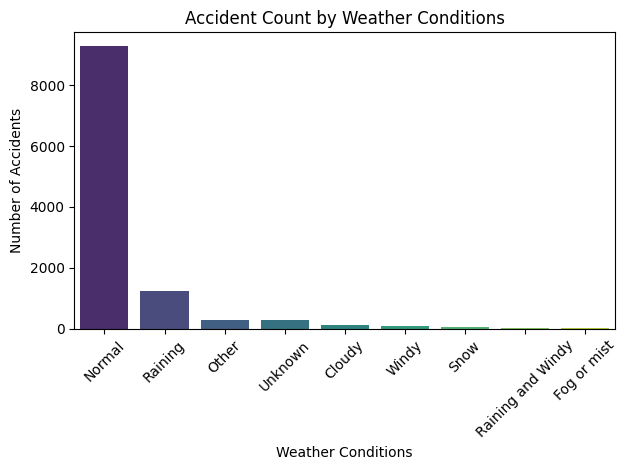

In [19]:
#Countplot : Count of accidents by weather conditions
sns.countplot(data=df, x='Weather_conditions', order=df['Weather_conditions'].value_counts().index, palette='viridis')
plt.title('Accident Count by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-20-9601f727f0e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Accident_severity', y='Age_band_of_casualty', data=df, palette='Set2')


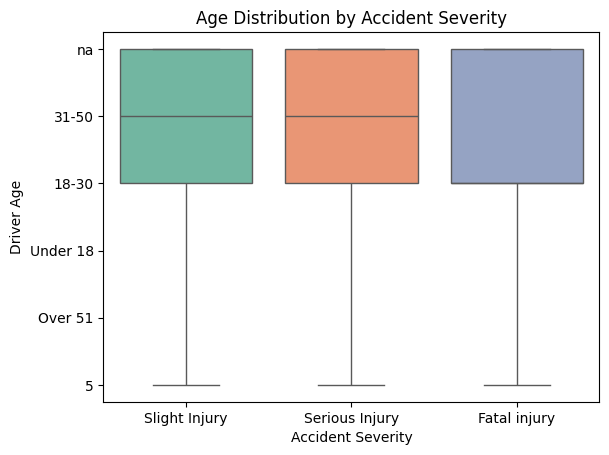

In [20]:
#BoxPlot : Age distribution by accident severity
sns.boxplot(x='Accident_severity', y='Age_band_of_casualty', data=df, palette='Set2')
plt.title('Age Distribution by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Driver Age')
plt.show()

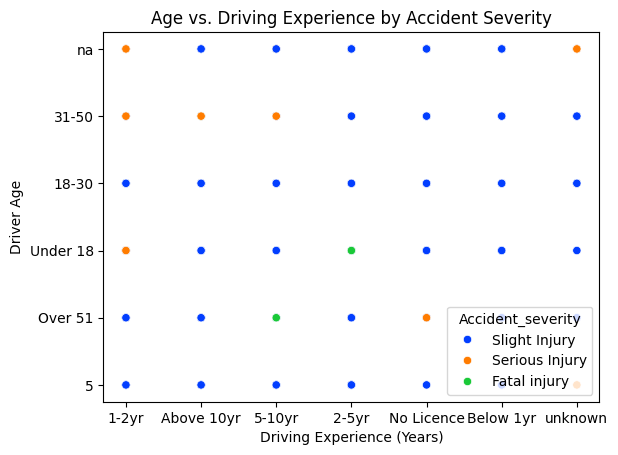

In [21]:
#Scatter Plot : Age vs Driving Experience by Accident Severity
sns.scatterplot(x='Driving_experience',y='Age_band_of_casualty',hue='Accident_severity',data=df,palette='bright')
plt.title('Age vs. Driving Experience by Accident Severity')
plt.xlabel('Driving Experience (Years)')
plt.ylabel('Driver Age')
plt.show()

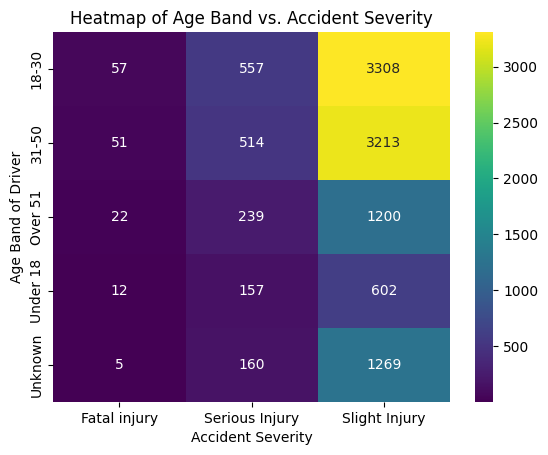

In [22]:
# Heatmap between 'Age_band_of_driver' and 'Accident_severity'
heatmap_data = pd.crosstab(df['Age_band_of_driver'], df['Accident_severity'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Age Band vs. Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Age Band of Driver')
plt.show()
